In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt 
plt.rcParams['figure.figsize'] = [10, 6]
import warnings
warnings.filterwarnings('ignore')

# 1 Read and Explore Data 

In [2]:
#read raw data 
df = pd.read_csv('dataset_mood_smartphone.csv', index_col=0)
#normalize time ( just keep date part)
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].dt.normalize()
df.head(n=3)

,id,time,variable,value
1,AS14.01,2014-02-26,mood,6.0
2,AS14.01,2014-02-26,mood,6.0
3,AS14.01,2014-02-26,mood,6.0


In [3]:
# describe data and see if we observe any weird values
df.drop(['id', 'time'], axis=1).groupby(['variable']).describe()

value                                               \
                        count        mean         std        min       25%   
variable                                                                     
activity              22965.0    0.115958    0.186946      0.000   0.00000   
appCat.builtin        91288.0   18.538262  415.989243 -82798.871   2.02000   
appCat.communication  74276.0   43.343792  128.912750      0.006   5.21800   
appCat.entertainment  27125.0   37.576480  262.960476     -0.011   1.33400   
appCat.finance          939.0   21.755251   39.218361      0.131   4.07200   
appCat.game             813.0  128.391615  327.145246      1.003  14.14800   
appCat.office          5642.0   22.578892  449.601382      0.003   2.00400   
appCat.other           7650.0   25.810839  112.781355      0.014   7.01900   
appCat.social         19145.0   72.401906  261.551846      0.094   9.03000   
appCat.travel          2846.0   45.730850  246.109307      0.080   5.08650   
appCat.unknown          939.0   45.553006  119.400405      0.111   5.01800   
appCat.utilities       2487.0   18.537552   60.959134      0.246   3.15850   
appCat.weather          255.0   20.148714   24.943431      1.003   8.68400   
call                   5239.0    1.000000    0.000000      1.000   1.00000   
circumplex.arousal     5597.0   -0.098624    1.051868     -2.000  -1.00000   
circumplex.valence     5487.0    0.687808    0.671298     -2.000   0.00000   
mood                   5641.0    6.992555    1.032769      1.000   7.00000   
screen                96578.0   75.335206  253.822497      0.035   5.32225   
sms                    1798.0    1.000000    0.000000      1.000   1.00000   

                                                        
                            50%         75%        max  
variable                                                
activity               0.021739    0.158333      1.000  
appCat.builtin         4.038000    9.922000  33960.246  
appCat.communication  16.225500   45.475750   9830.777  
appCat.entertainment   3.391000   14.922000  32148.677  
appCat.finance         8.026000   20.155000    355.513  
appCat.game           43.168000  123.625000   5491.793  
appCat.office          3.106000    8.043750  32708.818  
appCat.other          10.028000   16.829250   3892.038  
appCat.social         28.466000   75.372000  30000.906  
appCat.travel         18.144000   47.227250  10452.615  
appCat.unknown        17.190000   44.430500   2239.937  
appCat.utilities       8.030000   19.331000   1802.649  
appCat.weather        15.117000   25.349000    344.863  
call                   1.000000    1.000000      1.000  
circumplex.arousal     0.000000    1.000000      2.000  
circumplex.valence     1.000000    1.000000      2.000  
mood                   7.000000    8.000000     10.000  
screen                20.044500   62.540250   9867.007  
sms                    1.000000    1.000000      1.000

In [4]:
 # this looks wrong value as time can not be negative 
df.loc[df.value==-82798.871000, 'value'] = pd.np.nan

In [5]:
print( 'Total no of days data recorded: ', len(pd.date_range(df['time'].min(), df['time'].max())))

Total no of days data recorded:  113


In [6]:
#convert data ( long table to matrix )
#multiindex using 'id' and time 
df2 = df.pivot_table(index=['id', 'time'], columns='variable', values='value')
print(df2.shape)
df2.head(n=2)


(1973, 19)


variable            activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-17       NaN             NaN                   NaN   
        2014-02-18       NaN             NaN                   NaN   

variable            appCat.entertainment  appCat.finance  appCat.game  \
id      time                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
id      time                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
id      time                                                                 
AS14.01 2014-02-17             NaN               NaN             NaN   1.0   
        2014-02-18             NaN               NaN             NaN   1.0   

variable            circumplex.arousal  circumplex.valence  mood  screen  sms  
id      time                                                                   
AS14.01 2014-02-17                 NaN                 NaN   NaN     NaN  NaN  
        2014-02-18                 NaN                 NaN   NaN     NaN  NaN

Text(0, 0.5, 'Missing value %')

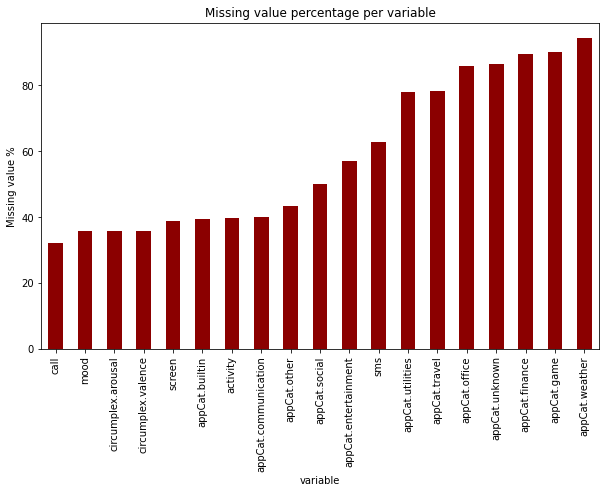

In [7]:
# missing value before removal of mood missing rows
(df2.isnull().sum()/df2.shape[0] *100).sort_values().plot(kind='bar', color='darkred')
plt.title('Missing value percentage per variable')
plt.ylabel('Missing value %')

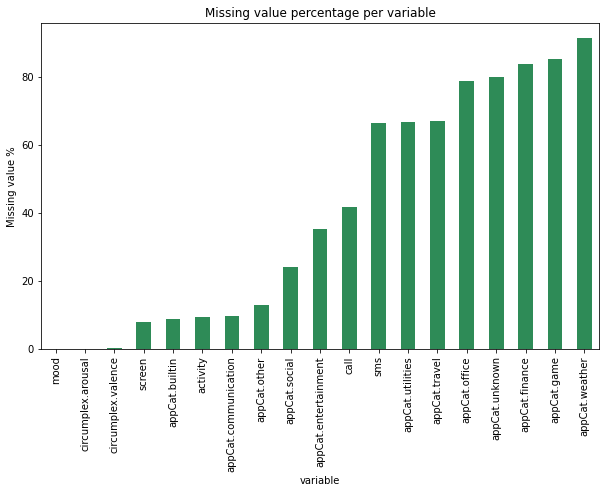

In [8]:
# remove rows where mood is missing as mood is our predictor
df2 = df2[~df2.mood.isnull()]
(df2.isnull().sum()/df2.shape[0] *100).sort_values().plot(kind='bar', color = 'seagreen')
plt.title('Missing value percentage per variable')
plt.ylabel('Missing value %')
plt.savefig('figures/missing_value_percentage.png', dpi=300)

Text(0.5, 1.0, 'Mood over time (averaged over all participants)')

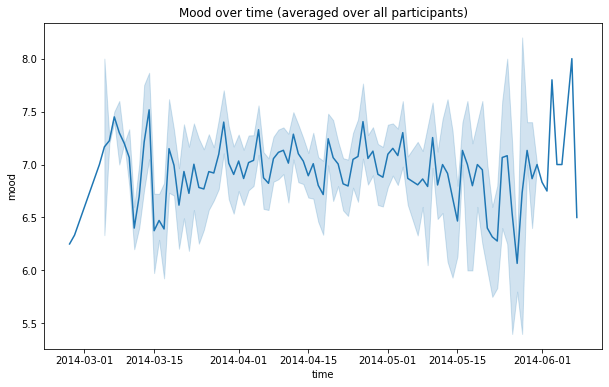

In [9]:
# see missing value pattern over date over all participant 
sns.lineplot(x= 'time', y = 'mood', data= df2.reset_index())
plt.title('Mood over time (averaged over all participants)')


# 2 Data Preprocessing

we have following set of variables
- variable which are measuring time ( its additive feature so we should sum them for same date per person)
- range variable such as arousal, valence activity  ( we should calculate mean for them per day per person)
- event variable we should count them - also sum variable as  value is given 0, 1  ( this is also additive  0 for no , 1  for yes) 


In [10]:
#Data engineering 
#attribute for which we need mean 
meanattribute = ['mood','activity', 'circumplex.valence', 'circumplex.arousal']
#rest attribute we will use sum 
sumdf = df[~df.variable.isin(meanattribute)]
meandf = df[df.variable.isin(meanattribute)]
sumdf2 = sumdf.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc=np.sum) # sum var
meandf2 = meandf.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc=np.mean) # mean var 
sumdf2.reset_index(inplace=True)
meandf.reset_index(inplace=True)
mergedf = sumdf2.join(meandf2, how='outer', on = ['id', 'time'])
# export data with missing mood (used by arima)
mergedf = mergedf.sort_values(['id', 'time'], ascending = True)
mergedf = mergedf.reset_index().drop(['index'], axis= 1)
mergedf.to_csv('data/data_arima.csv')
# remove rows for which mood is missing 
mergedf = mergedf[~mergedf.mood.isna()]
mergedf = mergedf.reset_index().drop(['index'], axis= 1)
mergedf.head(n=3)

variable,id,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,...,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood
0,AS14.01,2014-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,2.0,NaN,-0.25,0.750000,6.250000
1,AS14.01,2014-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.333333,6.333333
2,AS14.01,2014-03-21,3139.218,6280.89,1007.456,49.544,NaN,172.206,239.751,4508.5,...,NaN,598.754,NaN,6.0,17978.907,NaN,0.13405,0.20,0.200000,6.200000


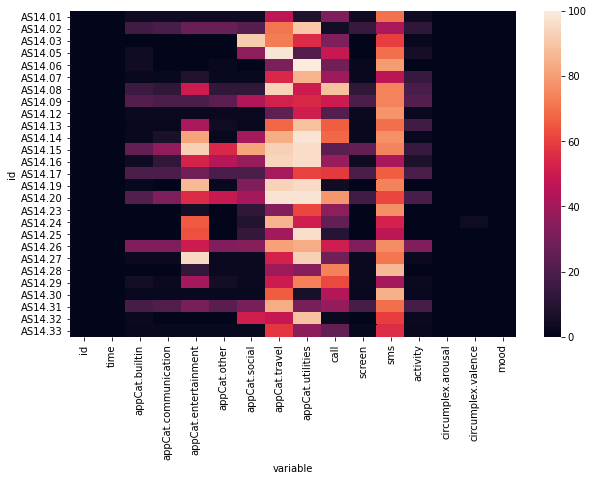

In [14]:
#count missing value percentage per individual for each variable 
missingdf = mergedf.groupby(['id']).apply(lambda x: x.isnull().sum()/len(x)*100)
sns.heatmap(missingdf)
missingdf.head(n=3)
plt.savefig('figures/missingvaluepercentagepervariableheatmap.png', dpi=300)

In [12]:
#drop columns which contains a lot of missing values
dropcols = missingdf.mean() #>=70 # so we will drop columns where we have > 70 % missing data ( rest we can add)
dropcols = dropcols[dropcols>70]
dropcols

variable
appCat.finance    82.829189
appCat.game       82.717038
appCat.office     77.400873
appCat.unknown    79.882491
appCat.weather    90.141521
dtype: float64

In [13]:
# remove discard columns from analysis
mergedf = mergedf.drop(dropcols.index, axis=1)

#### missing value imputation by median ( we do not use this for modeling)

In [36]:
#process 1 where we imput each column value with median ( as range varies a lot) # we dont use it for supervised modeling
# replace with median as you can see values are very far off ( for eg screen time may range from 100 to 15000 for same individual)
imputdf = mergedf.fillna(mergedf.groupby('id').transform('median'))


In [41]:
# utilities column still contains missing value which shows that one individual have not provided data for that 
# so we will replace that with average mean of utilities (global mean)
imputdf.isnull().sum()

variable
id                       0
time                     0
appCat.builtin           0
appCat.communication     0
appCat.entertainment     0
appCat.other             0
appCat.social            0
appCat.travel            0
appCat.utilities        45
call                     0
screen                   0
sms                      0
activity                 0
circumplex.arousal       0
circumplex.valence       0
mood                     0
dtype: int64

In [42]:
imputdf.loc[imputdf['appCat.utilities'].isnull(), 'appCat.utilities'] = imputdf['appCat.utilities'].mean()

#### Feature selection based on data from median imputed 

[0.03412158 0.04572742 0.05043405 0.03136254 0.04060129 0.04994962
 0.03538634 0.03760499 0.04041171 0.03818289 0.04755227 0.05303484
 0.49563046]


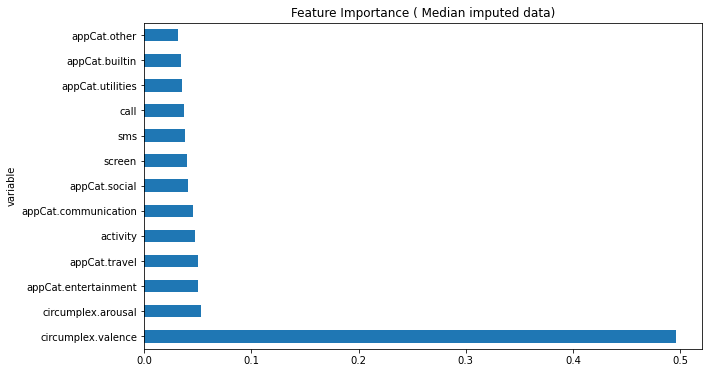

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
X = imputdf.drop(['id', 'time','mood'], axis=1)
y = imputdf.mood
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.title('Feature Importance ( Median imputed data)')
plt.show()


#### Preprocessing 2 ( we used this for modeling )

In [107]:
#process2 sum the app category to one feature 
data = mergedf.copy()
data['total_app_time'] = data.filter(regex='app', axis=1).sum(axis=1)
#sum call and sms together
data['call_sms'] = data[['call', 'sms']].sum(axis=1)
# select column we need in final data frame
data = data[['id', 'time', 'screen','activity', 'total_app_time','circumplex.arousal','circumplex.valence' ,'call_sms', 'mood']]

In [108]:
# total app and screen time are correlated so we should make total_app_time as missing where  we have value 0 and replace that with mean
data.loc[data.total_app_time==0, 'total_app_time'] = pd.np.nan
# imput missing value 
data = pd.concat([data[['id']] , data.groupby("id").transform(lambda x: x.fillna(x.mean()))], axis=1)
# after imputation 
data.head(n=3)

variable,id,time,screen,activity,total_app_time,circumplex.arousal,circumplex.valence,call_sms,mood
0,AS14.01,2014-02-26,12088.324244,0.092498,11327.579489,-0.25,0.750000,3.0,6.250000
1,AS14.01,2014-02-27,12088.324244,0.092498,11327.579489,0.00,0.333333,0.0,6.333333
2,AS14.01,2014-03-21,17978.907000,0.134050,16690.014000,0.20,0.200000,6.0,6.200000


<AxesSubplot:xlabel='variable', ylabel='variable'>

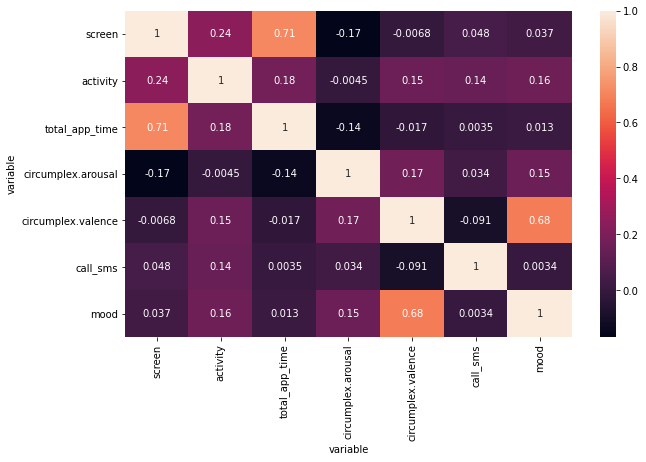

In [109]:
# calculate correlation between features
sns.heatmap(data.corr(), annot = True)

####  feature selection for processing aproach 2

[0.10001511 0.11179115 0.09301596 0.1041584  0.50865009 0.08236929]


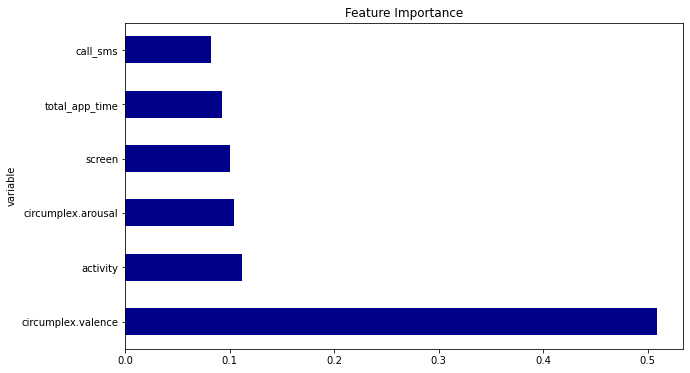

In [110]:
# feature selection for processing approach 2 data 
from sklearn.ensemble import ExtraTreesRegressor
X = data.drop(['id', 'time','mood'], axis=1)
y = data.mood
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh', color = 'darkblue')
plt.title('Feature Importance')
plt.show()


### Feature Engineering 

In [112]:
# add day name as features 
data['Day_name'] = data['time'].dt.day_name()
data['is_weekday'] = np.where(data['Day_name'].isin(['Sunday','Saturday']),0,1)
#add rolling mean of mood as faetures 
data['moodmean_5days'] = data['mood'].rolling(5).mean()
data['moodpreviousday'] = data['mood'].shift(1)
data['moodnextday'] = data['mood'].shift(-1)
Dayname = pd.get_dummies(data['Day_name'])
data = pd.concat([data, Dayname], axis=1) # concat this data 


In [113]:
finaldf = data.copy() # i will do averagin etc for feature part 

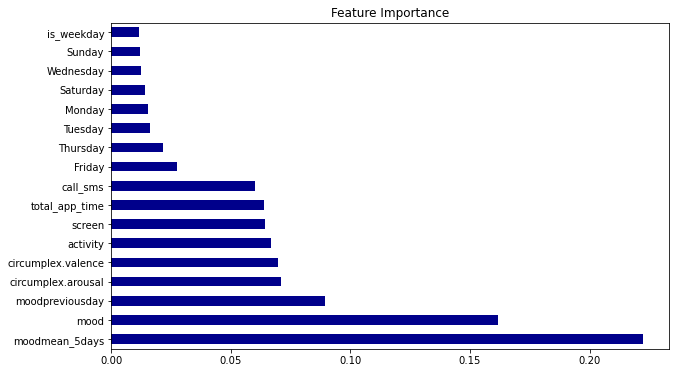

In [114]:
# feature selection for processing approach 2 data  after feature engineering 
from sklearn.ensemble import ExtraTreesRegressor
data = data.fillna(data.mean())
#Dayname = pd.get_dummies(data['Day_name'])
#data = pd.concat([data, Dayname], axis=1)
X = data.drop(['id', 'time','moodnextday', 'Day_name'], axis=1)
y = data.moodnextday
model = ExtraTreesRegressor()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh', color = 'darkblue')
plt.title('Feature Importance')
plt.show()


##### Final data 

In [115]:
finaldf.head(n=2)

,id,time,screen,activity,total_app_time,circumplex.arousal,circumplex.valence,call_sms,mood,Day_name,...,moodmean_5days,moodpreviousday,moodnextday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,AS14.01,2014-02-26,12088.324244,0.092498,11327.579489,-0.25,0.750000,3.0,6.250000,Wednesday,...,NaN,NaN,6.333333,0,0,0,0,0,0,1
1,AS14.01,2014-02-27,12088.324244,0.092498,11327.579489,0.00,0.333333,0.0,6.333333,Thursday,...,NaN,6.25,6.200000,0,0,0,0,1,0,0


In [116]:
finaldf.to_csv('cleandata_mood.csv', sep = "\t", index= False)

#### Some info for report 
